# The Movie Database Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#libraries">Python Libraries</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Movie Database (TMDb) has accumulated data of movies that are produced between 1960 and 2015. Following data points are stored for each movie:
<ul>
  <li>imdb_id</li>
  <li>popularity</li>
  <li>budget</li>
  <li>revenue</li>
  <li>original_title</li>
  <li>cast</li>
  <li>director</li>
  <li>runtime</li>
  <li>genres</li>
  <li>production_companies</li>
  <li>release_date</li>
  <li>vote_count</li>
  <li>vote_average</li>
  <li>release_year</li>
  <li>budget_adj</li>
  <li>revenue_adj</li>
</ul>

We are going to answer following questions by using the TMDb data:
1. How does various data points are related and how they influence economic success of the movie?
2. How does the time of release effect the profits made by a movie?

<a id='libraries'></a>
## Python Libraries

For Data Analysis and Visualization, we will be using following Python Libraries:
    1. Pandas
    2. Numpy
    3. Seaborn
    4. MatplotLib

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Below lines of code will 
1. ask Jupyter to generate Visualizations with in the notebook with Zooming functionality.
2. ask Pandas not to load floating point values in scientific format.

In [2]:
%matplotlib notebook
pd.options.display.float_format = '{:20,.2f}'.format

<a id='wrangling'></a>
## Data Wrangling

### General Properties

We have downloaded <a  href="https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&amp;sa=D&amp;ust=1529775399976000">TMDb movie data</a> in CSV format as "tmdb-movies.csv" in same folder as notebook.

We will load this CSV file as Pandas DataFrame object

In [3]:
tmdb_movies_df = pd.read_csv("tmdb-movies.csv")

After creating Data Frame, lets analyze the structure.

In [4]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning
On close analysis, there are few issues with the data:
1. There is no analytical value for 'homepage','tagline','keywords','overview' attributes.
2. There is no logical way to populate missing values in 'imdb_id','director','genres'.
3. release_date is stored as object (String).
4. budget and revenue columns are of type int.
5. Some of the records with budget or revenue adjustment attributs have 0 value.

To clean up the data we will:
1. Remove 'homepage','tagline','keywords','overview' attributes.
2. Remove records with missing 'imdb_id','director','genres' values.
3. Covert release_date to datetime object.
4. Conver budget and revenue columns to float.
5. Remove records with budget or revenue adjustment with 0 as the value.

In [5]:
tmdb_movies_df.drop(columns=['homepage','tagline','overview','keywords'],inplace=True)

In [6]:
tmdb_movies_df.dropna(subset=["imdb_id","director","genres"],inplace=True)

In [7]:
tmdb_movies_df.fillna(value={"production_companies":"Indie"},inplace=True)

In [8]:
tmdb_movies_df['release_date']=pd.to_datetime(tmdb_movies_df['release_date'])

In [9]:
tmdb_movies_df[['budget','revenue']]=tmdb_movies_df[['budget','revenue']].astype(float)

In [10]:
is_budget_zero = tmdb_movies_df['budget_adj']==0
is_revenue_zero = tmdb_movies_df['revenue_adj']==0
zero_bud_re_df=tmdb_movies_df[is_budget_zero|is_revenue_zero]
tmdb_movies_df.drop(zero_bud_re_df.index,inplace=True)

After cleaning lets analyze the structure again.

In [11]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 17 columns):
id                      3854 non-null int64
imdb_id                 3854 non-null object
popularity              3854 non-null float64
budget                  3854 non-null float64
revenue                 3854 non-null float64
original_title          3854 non-null object
cast                    3850 non-null object
director                3854 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3854 non-null object
release_date            3854 non-null datetime64[ns]
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
budget_adj              3854 non-null float64
revenue_adj             3854 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(4), object(6)
memory usage: 542.0+ KB


After cleaning lets analyze the structure again.

We find that cast column still have some missing values. On close examine we find some of the missing cast records are Animation movies.

We will 
1. delete the non-Animation movies with missing Cast 
2. populate the Animation movies with Cast as "Anime"


In [12]:
is_cast_null = tmdb_movies_df.cast.isnull()
is_animation = tmdb_movies_df.genres.str.contains('Animation', na=False,case=True, regex=True)
df =tmdb_movies_df[is_cast_null & -is_animation]

In [13]:
tmdb_movies_df.drop(df.index,inplace=True)

In [14]:
tmdb_movies_df.fillna(value={"cast":"Anime"},inplace=True)

Let’s examine the data frame structure again.

In [15]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 17 columns):
id                      3850 non-null int64
imdb_id                 3850 non-null object
popularity              3850 non-null float64
budget                  3850 non-null float64
revenue                 3850 non-null float64
original_title          3850 non-null object
cast                    3850 non-null object
director                3850 non-null object
runtime                 3850 non-null int64
genres                  3850 non-null object
production_companies    3850 non-null object
release_date            3850 non-null datetime64[ns]
vote_count              3850 non-null int64
vote_average            3850 non-null float64
release_year            3850 non-null int64
budget_adj              3850 non-null float64
revenue_adj             3850 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(4), object(6)
memory usage: 541.4+ KB


Now there are no missing values in Data Frame.

As part of our analysis question, we are looking how different genres effect the profitability of the movie. But in the data frame we have list of genres under which the movie will fall under are stored as String with "|" delimiter.

We will expand the genres column into multiple columns, one for each genre. 

Let’s get unique genres in the column:


In [16]:
genre_type = pd.unique(tmdb_movies_df['genres'].str.split("|",expand=True).values.ravel())
genre_type.sort

<function ndarray.sort>

Now let’s create new column for each of the genre. If the genre is present in the movie it will be marked as True, else False.

In [17]:
for typ in genre_type:
    if typ is not None:
        tmdb_movies_df[typ] = tmdb_movies_df.genres.str.contains(typ)

Let’s examine new data frame structure and sample data.

In [18]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 37 columns):
id                      3850 non-null int64
imdb_id                 3850 non-null object
popularity              3850 non-null float64
budget                  3850 non-null float64
revenue                 3850 non-null float64
original_title          3850 non-null object
cast                    3850 non-null object
director                3850 non-null object
runtime                 3850 non-null int64
genres                  3850 non-null object
production_companies    3850 non-null object
release_date            3850 non-null datetime64[ns]
vote_count              3850 non-null int64
vote_average            3850 non-null float64
release_year            3850 non-null int64
budget_adj              3850 non-null float64
revenue_adj             3850 non-null float64
Action                  3850 non-null bool
Adventure               3850 non-null bool
Science Fiction         3850 no

In [19]:
tmdb_movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,Foreign,TV Movie
0,135397,tt0369610,32.99,"150,000,000.00","1,513,528,810.00",Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,...,False,False,False,False,False,False,False,False,False,False
1,76341,tt1392190,28.42,"150,000,000.00","378,436,354.00",Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,...,False,False,False,False,False,False,False,False,False,False
2,262500,tt2908446,13.11,"110,000,000.00","295,238,201.00",Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,...,False,False,False,False,False,False,False,False,False,False
3,140607,tt2488496,11.17,"200,000,000.00","2,068,178,225.00",Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,...,False,False,False,False,False,False,False,False,False,False
4,168259,tt2820852,9.34,"190,000,000.00","1,506,249,360.00",Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,...,False,False,False,False,False,False,False,False,False,False


We no longer need consolidate genera’s information as it is redundant. Let’s drop the column.

In [20]:
tmdb_movies_df.drop(columns=["genres"],inplace=True)

Now lets calculate how much profit each movie made and store in  new column profit. We will use inflation adjusted amount for the calculation.

In [21]:
tmdb_movies_df['profit'] = (tmdb_movies_df['revenue_adj']-tmdb_movies_df['budget_adj'])

Lets examine new data frame structure

In [22]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 37 columns):
id                      3850 non-null int64
imdb_id                 3850 non-null object
popularity              3850 non-null float64
budget                  3850 non-null float64
revenue                 3850 non-null float64
original_title          3850 non-null object
cast                    3850 non-null object
director                3850 non-null object
runtime                 3850 non-null int64
production_companies    3850 non-null object
release_date            3850 non-null datetime64[ns]
vote_count              3850 non-null int64
vote_average            3850 non-null float64
release_year            3850 non-null int64
budget_adj              3850 non-null float64
revenue_adj             3850 non-null float64
Action                  3850 non-null bool
Adventure               3850 non-null bool
Science Fiction         3850 non-null bool
Thriller                3850 non-

<a id='eda'></a>
## Exploratory Data Analysis

### How does varios data points are related and how they influence econical sucess of the movie?

To answer the above question, lets visualize the correlation values between following attributes:
1.	popularity 
2.	budget_adj 
3.	vote_average 
4.	runtime 
5.	Action 
6.	Adventure 
7.	Science Fiction 
8.	Thriller 
9.	Fantasy 
10.	Crime 
11.	Western 
12.	Drama 
13.	Family 
14.	Animation 
15.	Comedy 
16.	Mystery 
17.	Romance 
18.	War 
19.	History 
20.	Music 
21.	Horror 
22.	Documentary 
23.	TV Movie 
24.	Foreign 
25.	profit 

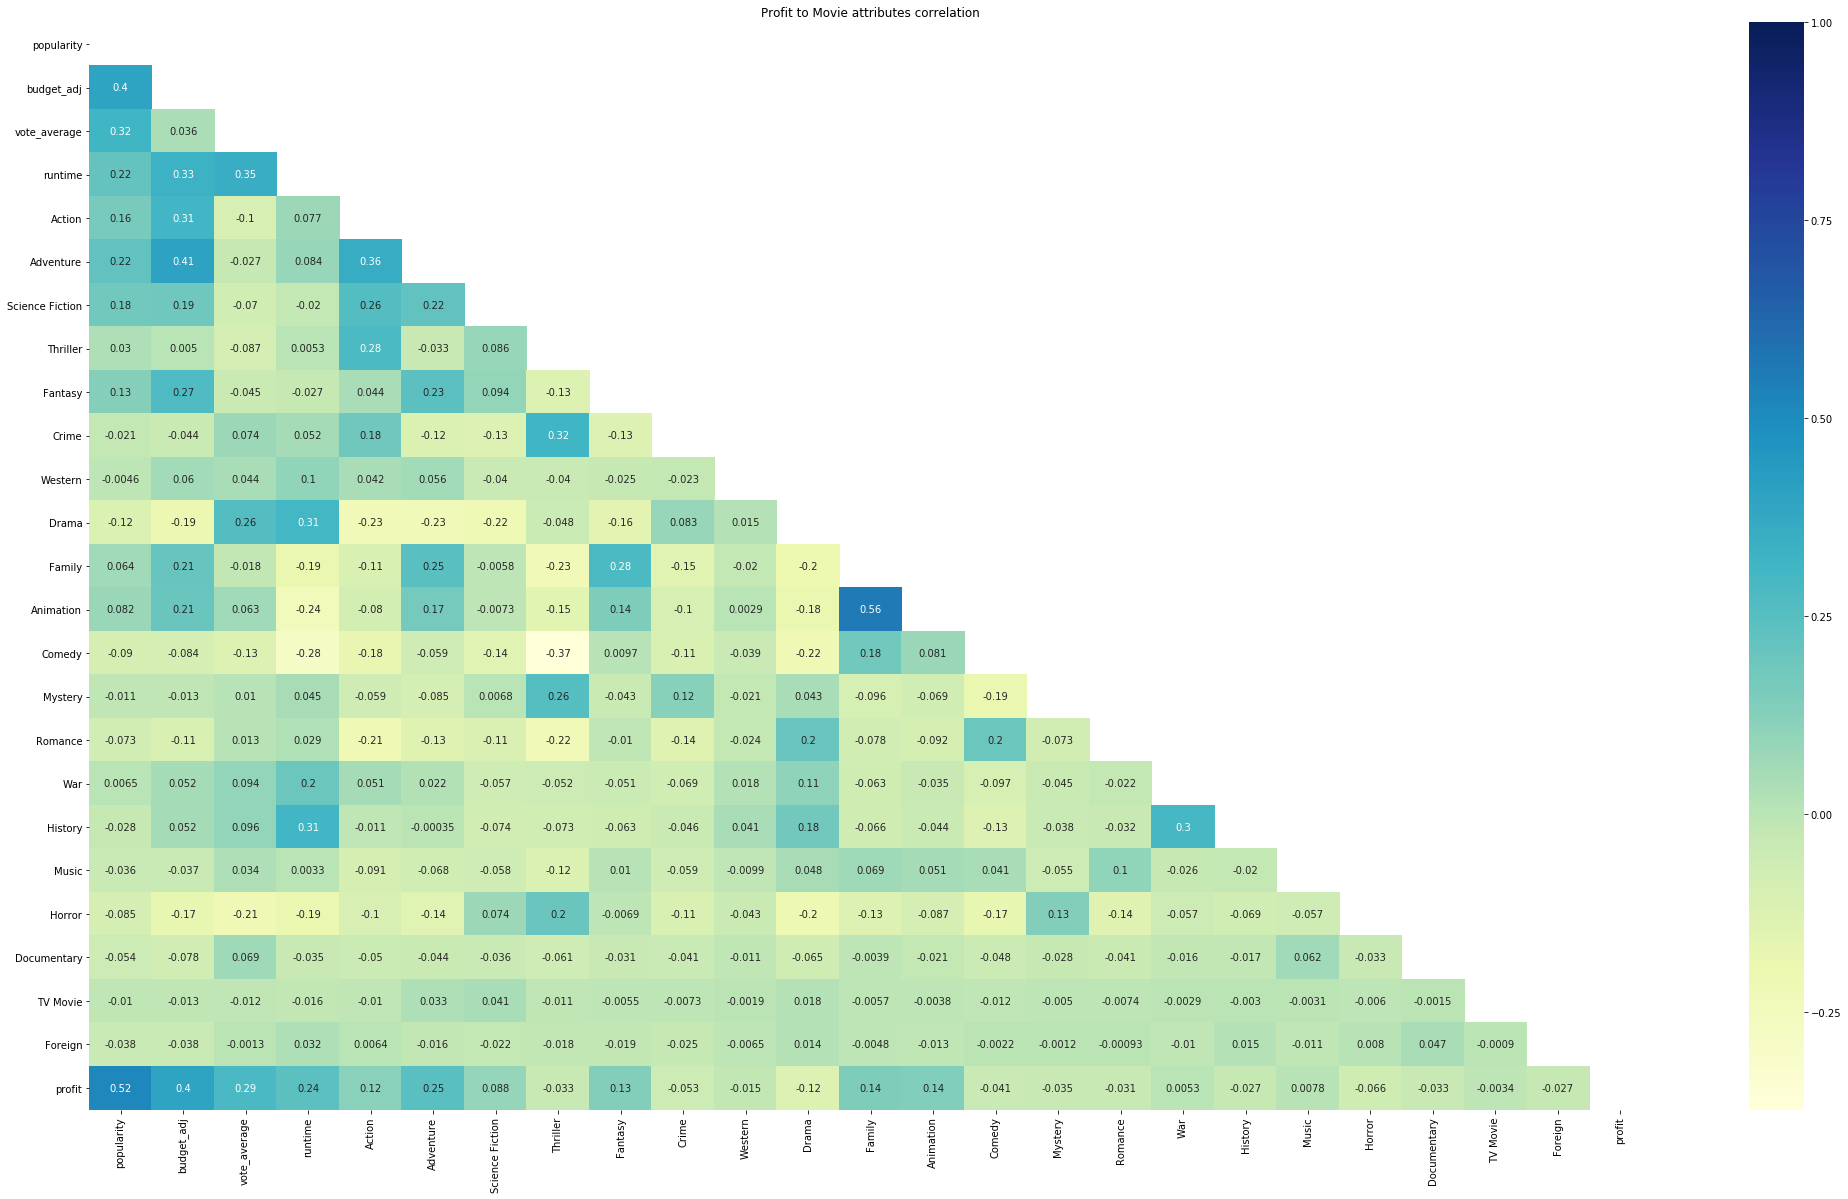

In [23]:
%matplotlib inline
#Uncomment below line of code if you want to Zoom into the output.
#%matplotlib notebook

plt.figure(figsize=(35,20))
corr = tmdb_movies_df[['popularity','budget_adj','vote_average','runtime','Action','Adventure','Science Fiction','Thriller','Fantasy','Crime','Western','Drama','Family','Animation','Comedy','Mystery','Romance','War','History','Music','Horror','Documentary','TV Movie','Foreign','profit']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, mask=mask, cmap="YlGnBu", annot=True);
plt.title("Profit to Movie attributes correlation")
plt.show(ax);

We can make following deductions out of the above Visualization:
1. Popular movies make more profit.
2. High budget movies have more chance of profiting.
3. More the number voting average the chance of getting profit is more.
4. Movies of genres Action, Adventure, Science Fiction, Thriller, Fantasy, Crime, Family, Animation, War, Music tend to make more profit when compared to Western, Drama, Comedy, Mystery, Romance, History, Horror, Documentary, TV Movie, Foreign genres.

### How does the time of release effect the profits made by a movie?

To answer the above question, lets visualize the correlation of profit and month of release. Let’s create new data frames out of existing data  frame for this analysis.

In [24]:
tmdb_movies_relase_month_df = tmdb_movies_df[['imdb_id','profit','release_date']]

Let’s examine new data frame structure and sample data.

In [25]:
tmdb_movies_relase_month_df.head()

,imdb_id,profit,release_date
0,tt0369610,"1,254,445,953.24",2015-06-09
1,tt1392190,"210,161,353.21",2015-05-13
2,tt2908446,"170,419,069.94",2015-03-18
3,tt2488496,"1,718,723,210.76",2015-12-15
4,tt2820852,"1,210,948,878.38",2015-04-01


In [26]:
tmdb_movies_relase_month_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 3 columns):
imdb_id         3850 non-null object
profit          3850 non-null float64
release_date    3850 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 120.3+ KB


Now let’s create one column per month and populate with True for the respective month on which movie released and examine sample output.

In [27]:
for i in range(1,13):
    tmdb_movies_relase_month_df["month_{0}".format(i)]= (tmdb_movies_relase_month_df['release_date'].dt.month==i)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
tmdb_movies_relase_month_df.head()

,imdb_id,profit,release_date,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,tt0369610,"1,254,445,953.24",2015-06-09,False,False,False,False,False,True,False,False,False,False,False,False
1,tt1392190,"210,161,353.21",2015-05-13,False,False,False,False,True,False,False,False,False,False,False,False
2,tt2908446,"170,419,069.94",2015-03-18,False,False,True,False,False,False,False,False,False,False,False,False
3,tt2488496,"1,718,723,210.76",2015-12-15,False,False,False,False,False,False,False,False,False,False,False,True
4,tt2820852,"1,210,948,878.38",2015-04-01,False,False,False,True,False,False,False,False,False,False,False,False


We no longer need release date value, lets drop the column.

In [29]:
tmdb_movies_relase_month_df.drop(columns=['release_date'],inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Let’s create a new data frame with 1 row with profit to month correlation value each calendar month and view data (as there is only 1 record in data frame).

In [30]:
profit_month_corr = pd.DataFrame([{"id":1}])
for i in range(1,13):
    profit_month_corr['profit_month_{0}_corr'.format(i)] = tmdb_movies_relase_month_df['profit'].corr(tmdb_movies_relase_month_df['month_{0}'.format(i)])

In [31]:
profit_month_corr.head()

,id,profit_month_1_corr,profit_month_2_corr,profit_month_3_corr,profit_month_4_corr,profit_month_5_corr,profit_month_6_corr,profit_month_7_corr,profit_month_8_corr,profit_month_9_corr,profit_month_10_corr,profit_month_11_corr,profit_month_12_corr
0,1,-0.06,-0.06,-0.01,-0.03,0.08,0.12,0.05,-0.06,-0.11,-0.05,0.05,0.08


Let’s give columns meaningful names and plot on a bar graph.

In [32]:
profit_month_corr.rename(columns={'profit_month_1_corr':"January",'profit_month_2_corr':"February",'profit_month_3_corr':'March','profit_month_4_corr':'April','profit_month_5_corr':"May",'profit_month_6_corr':"June",'profit_month_7_corr':"July",'profit_month_8_corr':"August",'profit_month_9_corr':"September",'profit_month_10_corr':"October",'profit_month_11_corr':"November",'profit_month_12_corr':"December"},inplace=True)

Let’s reshape the data frame with Month and Correlation values as rows instead of columns.

In [33]:
profit_month = pd.melt(profit_month_corr, var_name="Month",value_name="Corr")

In [34]:
profit_month.drop(0,inplace=True)

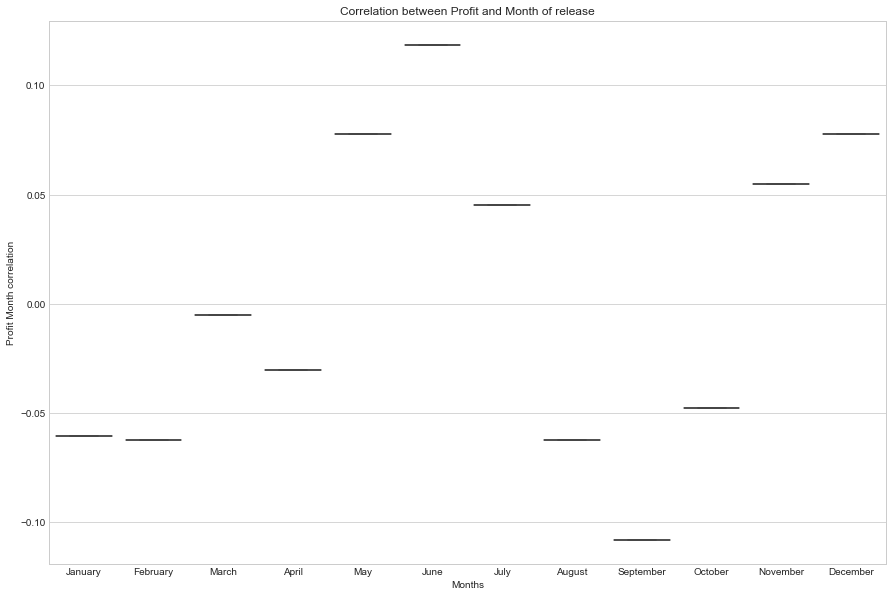

In [35]:
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
sns.boxplot(x="Month",y="Corr", data=profit_month);
plt.xlabel("Months")
plt.ylabel("Profit Month correlation");
plt.title("Correlation between Profit and Month of release");

We can make following deductions out of the above Visualization:
1.	Movies released in May, June, July, November and December make more profit. 
2.	Movies released in January, February, March, April, August, September, October make less profit in comparison. 
3.	Movies released in September make least profit.
4.	Movies released in June make most profit.

Let's analyze the Inflation adjusted Revenue and Budget frequency.

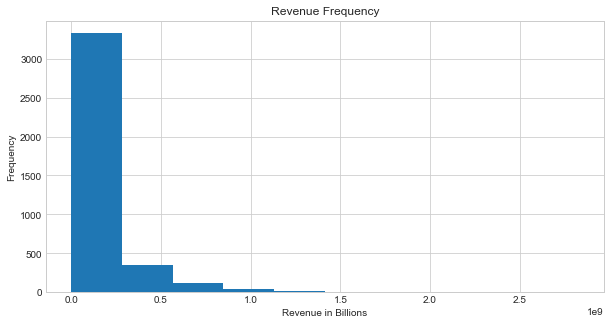

In [36]:
plt.figure(figsize=(10,5))
tmdb_movies_df['revenue_adj'].plot(kind="hist");
plt.xlabel("Revenue in Billions");
plt.title("Revenue Frequency");

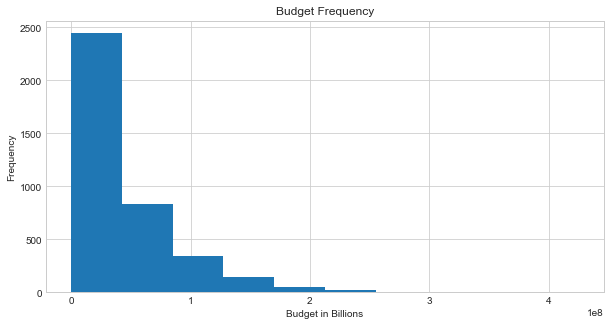

In [37]:
plt.figure(figsize=(10,5))
tmdb_movies_df['budget_adj'].plot(kind="hist");
plt.xlabel("Budget in Billions");
plt.title("Budget Frequency");

From the above two plots we can deduce that:
1. Movies that are of budget more than 1.5 Billion Dollars are not making profit.
2. The chance of making profit for movies with budget more than 0.5 Billion Dollars is slim.
3. There is good chance of making profit for movies with Budget less than .25 Billon Dollars.

### Limitations
Majority of the records have either revenue or budget values as 0, these records are discarded. Because of this the data set size is reduced from ~10,000 records to ~4000 records.
<a id='conclusions'></a>
## Conclusions

On conclusion we can say, high budget movies in Action, Adventure, Science Fiction, Thriller, Fantasy, Crime, Family, Animation, War, Music genres releasing in Summer or during Thanksgiving/ Christmas tend to make more profit.

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'TMDb Data Analysis.ipynb'])

0